
## Bike sharing demand

### Data fields


datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Questions to answer

    1. Which factors contribute most to the number of bicycles being checkout over the course of a given day?
    2.How much impact doeas weather have on demand?
    3. How does the behaviour of casual users differ from subscribers?

“Given the forecasted weather conditions, how many bicycles can we expect to be checkout this Saturday at 2pm?”

### Data exploration

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score




from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
sns.set() 
sns.set_style("white")

In [2]:
df = pd.read_csv('train_bike.csv', parse_dates=True)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


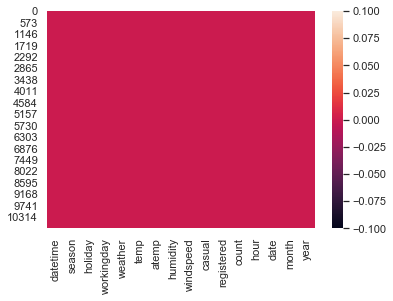

In [8]:
sns.heatmap(df.isna())

In [9]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,1,2011


In [10]:

df.rename(columns={'count':'total'},inplace=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011-01-01,1,2011


### Train Test Split

In [11]:
y = df[['total']]
X = df.drop([ 'casual', 'registered'], axis=1)

In [12]:
y.head()

,total
0,16
1,40
2,32
3,13
4,1


In [13]:
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,hour,date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2011-01-01,1,2011


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7293, 14), (3593, 14), (7293, 1), (3593, 1))

In [16]:
X_train.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
total         False
hour          False
date          False
month         False
year          False
dtype: bool

In [17]:
X_train.groupby('workingday').total.mean()

workingday
0    187.115986
1    193.304348
Name: total, dtype: float64

In [18]:
X_train.groupby('hour').total.mean()

hour
0      53.938111
1      34.251773
2      22.760000
3      12.200000
4       6.269625
5      19.610592
6      75.585616
7     218.882550
8     355.273333
9     224.396825
10    173.204013
11    203.493548
12    253.364238
13    259.577049
14    245.447284
15    245.486301
16    316.462500
17    459.229358
18    436.346278
19    307.279070
20    229.955782
21    169.608414
22    133.843137
23     89.113636
Name: total, dtype: float64

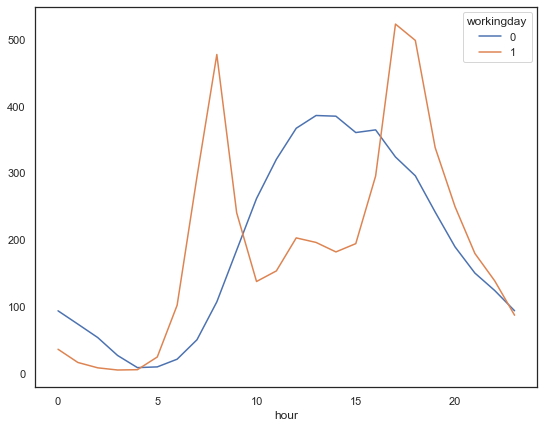

In [46]:

X_train.groupby(['hour','workingday']).total.mean().unstack().plot(figsize=(9,7))


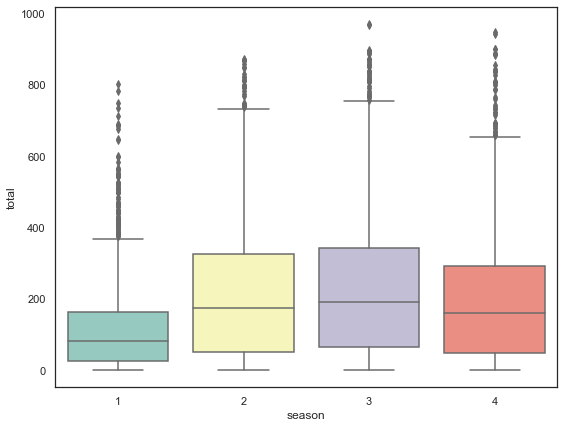

In [30]:
plt.figure(figsize=(9,7))
sns.boxplot( x='season', y='total', data=X_train, palette='Set3')


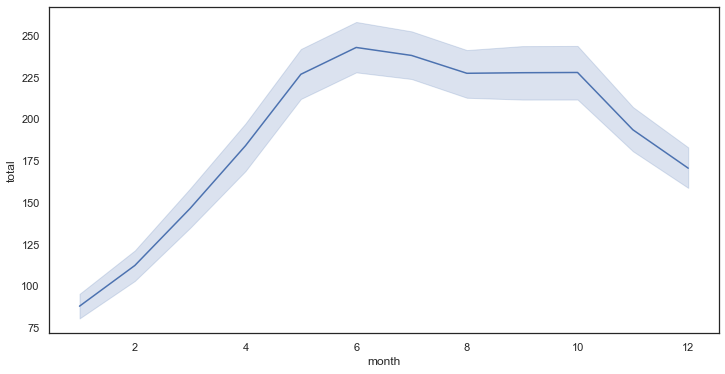

In [23]:
plt.figure(figsize=(12,6))

sns.lineplot(data=X_train, x="month", y="total")

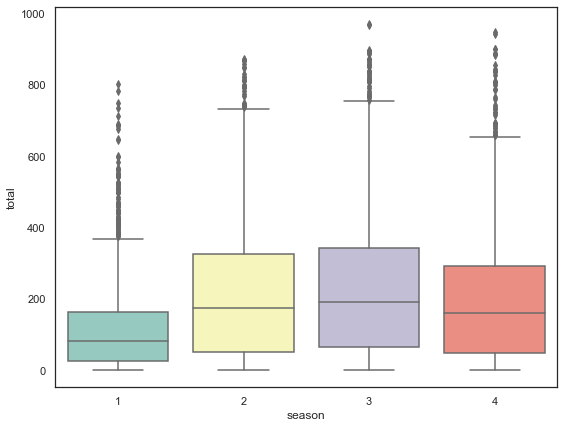

In [47]:
plt.figure(figsize=(9,7))
sns.boxplot( x='season', y='total', data=X_train, palette='Set3')

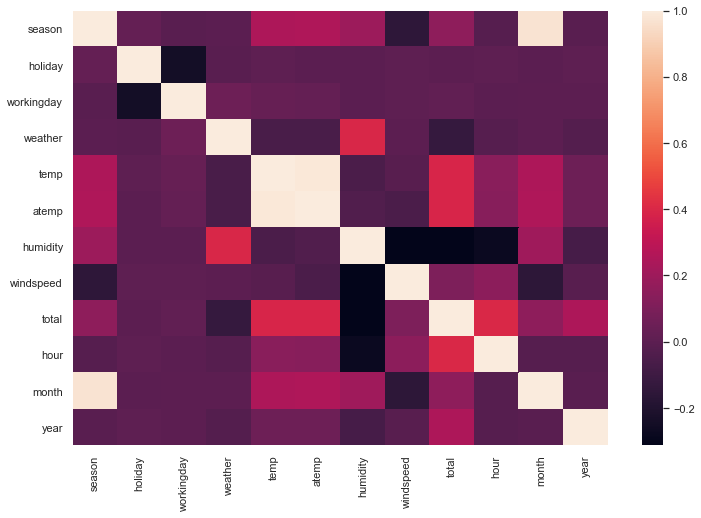

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr())

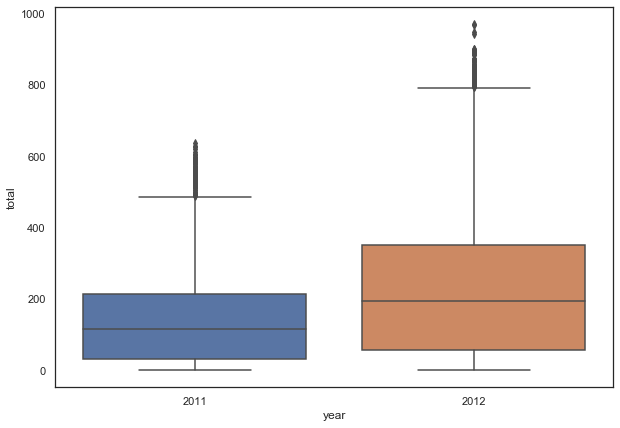

In [57]:
plt.figure(figsize=(10,7))

sns.boxplot(data=X_train[['total', 'year']],x='year',y='total')


In [32]:
X_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total,hour,date,month,year
5263,2011-12-13 09:00:00,4,0,1,1,10.66,12.880,60,11.0014,233,9,2011-12-13,12,2011
5261,2011-12-13 07:00:00,4,0,1,1,6.56,8.335,80,11.0014,223,7,2011-12-13,12,2011


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


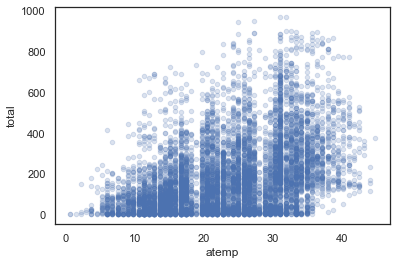

In [42]:

X_train.plot(kind='scatter', x='atemp',y='total', alpha=0.2)

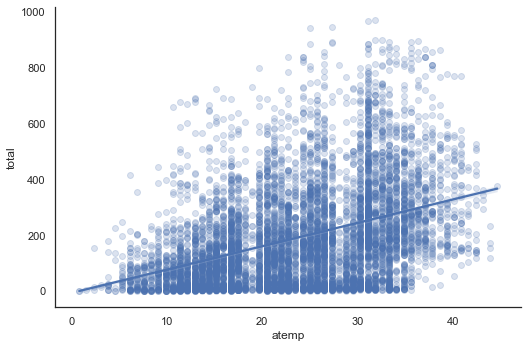

In [44]:
sns.lmplot(x='atemp', y='total',data=X_train, aspect=1.5,scatter_kws={'alpha':0.2})

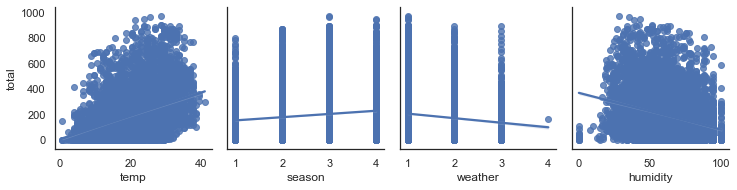

In [45]:
feature_col = ['temp','season','weather','humidity']
sns.pairplot(x_vars=feature_col,y_vars='total',data=X_train ,kind='reg')

### Feature Engineering

In [58]:
X_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'total', 'hour', 'date', 'month',
       'year'],
      dtype='object')

In [69]:
def create_time(df):
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['datetime']).dt.date
    df['year'] = pd.to_datetime(df['datetime']).dt.year
    df['month'] = pd.to_datetime(df['datetime']).dt.month
    df['day'] = pd.to_datetime(df['datetime']).dt.day
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour
    df['weekday'] = pd.to_datetime(df['datetime']).dt.weekday

    
    return df

In [70]:
dummy_features = ['year', 'month', 'hour', 'day']
passthrough_features = ['atemp', 'holiday', 'humidity', 'season', 'windspeed']
interaction_features = ['weather']

In [71]:
column_transformer = ColumnTransformer(transformers=[
                        ('dummy', OneHotEncoder(), dummy_features),
                        ('interaction_polynomial', PolynomialFeatures(degree=4), interaction_features), 
                        ('pass', 'passthrough', passthrough_features)
                        ])

In [72]:
transformer_pipeline = Pipeline(steps=[
                        ('create_time', FunctionTransformer(create_time)),
                        ('column_transformer', column_transformer)
])

In [77]:
X_train_trans=transformer_pipeline.fit_transform(X_train)

### Fit a model


In [78]:
m = LinearRegression()
m.fit(X_train_trans, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
m.score(X_train_trans, y_train)

0.6955057979506891

In [84]:
cross_val_score(m, X_train_trans, y_train)

array([0.70649037, 0.66902443, 0.67448881, 0.69381627, 0.69863783])

In [81]:
X_test_trans = transformer_pipeline.fit_transform(X_test)

In [82]:
m.fit(X_test_trans, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
ypred_LinReg = m.predict(X_test_trans)